## 13.1

Text(0, 0.5, '花瓣长度')

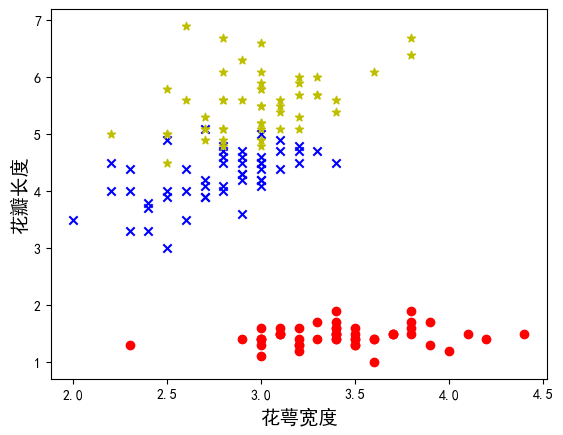

In [1]:
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
#在图中显示中文
mp.rcParams['font.sans-serif'] = [u'SimHei']
mp.rcParams['axes.unicode_minus'] = False


iris = load_iris()
##取150个样本，取前两列特征，花萼长度和宽度
x=iris.data[0:150,1:3]  #能看特征数据的具体信息
y=iris.target[0:150]   #能看每行数据的标签的值
##分别取前两类样本，0和1
samples_0 = x[y==0, :]#把y=0,即Iris-setosa的样本取出来
samples_1 = x[y==1, :]#把y=1，即Iris-versicolo的样本取出来
samples_2 = x[y==2, :]#把y=2，即Iris-virginica的样本取出来
#散点图可视化
plt.scatter(samples_0[:,0],samples_0[:,1],marker='o',color='r')
plt.scatter(samples_1[:,0],samples_1[:,1],marker='x',color='b')
plt.scatter(samples_2[:,0],samples_2[:,1],marker='*',color='y')
plt.xlabel('花萼宽度', fontsize=14)
plt.ylabel('花瓣长度',fontsize=14)


## 13.2

In [7]:
from sklearn.datasets import load_iris
#导入鸢尾花数据集
from sklearn.model_selection import train_test_split
#实例化对象
iris=load_iris()
#数据集的划分,将原始数据集划分为训练集和测试集
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2,random_state=22)

## 13.3

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
 
%matplotlib inline

iris_data = load_iris()
X = iris_data["data"]
y = iris_data["target"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# 使用默认的近邻数量和权重，查看预测精度
knn = KNeighborsClassifier()    # 默认 n_neighbors = 5, weight = 'uniform'
knn.fit(X_train, y_train)       # 用训练数据拟合模型
print("模型精度：", knn.score(X_test, y_test))

模型精度： 0.9736842105263158


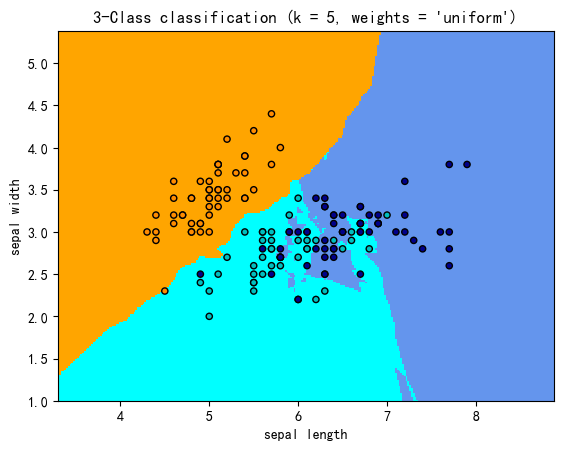

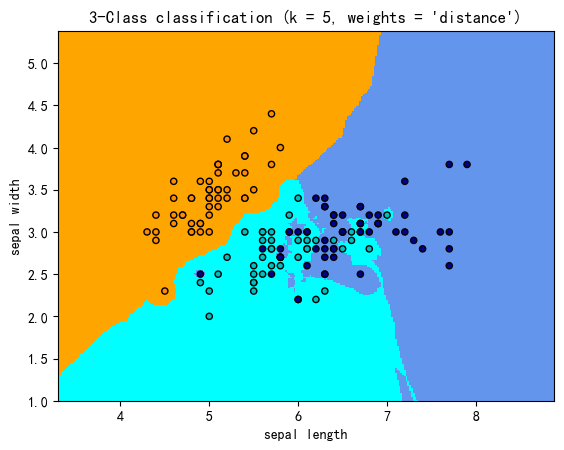

In [9]:
# 使用花萼长度和花萼宽度，设置近邻数量为5，绘制KNN分类器图
X = iris_data["data"][:,(0,1)]
y = iris_data["target"]
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
 
from matplotlib.colors import ListedColormap
h = .02  # 设置网格中的步长
n_neighbors = 5
 
# 提取色谱
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])
 
for weights in ['uniform', 'distance']:
    # 我们创建最近邻分类器的实例并拟合数据。
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
 
    # 绘制决策边界。 为此，我们将为网格[x_min，x_max] x [y_min，y_max]中的每个点分配颜色。
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # 将结果放入颜色图
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
    # 绘制训练数据
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
 
plt.show()

## 14.2

In [11]:
 texts = ['Chinese Bejing Chinese',
'Chinese Chinese Shanghai',
'Chinese Macao',
'Tokyo Japan Chinese']
from sklearn.feature_extraction.text import CountVectorizer
# One-Hot表示法
cv = CountVectorizer(binary=True)
document_vec = cv.fit_transform(texts)
# 词袋
cv.get_feature_names_out()


array(['bejing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo'],
      dtype=object)

In [12]:
document_vec.toarray()

array([[1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [13]:
# TF表示法
cv = CountVectorizer()
document_vec = cv.fit_transform(texts)
document_vec.toarray()

array([[1, 2, 0, 0, 0, 0],
       [0, 2, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1]], dtype=int64)

In [15]:
# TF-IDF表示法（未平滑）
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(use_idf=True, smooth_idf=False, norm=None)
tv_fit = tv.fit_transform(texts)
tv.get_feature_names_out()

array(['bejing', 'chinese', 'japan', 'macao', 'shanghai', 'tokyo'],
      dtype=object)

In [16]:
tv_fit.toarray()

array([[2.38629436, 2.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 2.        , 0.        , 0.        , 2.38629436,
        0.        ],
       [0.        , 1.        , 0.        , 2.38629436, 0.        ,
        0.        ],
       [0.        , 1.        , 2.38629436, 0.        , 0.        ,
        2.38629436]])

In [17]:
# TF-IDF表示法（平滑）
tv = TfidfVectorizer(use_idf=True, smooth_idf=True, norm=None)
tv_fit = tv.fit_transform(texts)
tv_fit.toarray()

array([[1.91629073, 2.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 2.        , 0.        , 0.        , 1.91629073,
        0.        ],
       [0.        , 1.        , 0.        , 1.91629073, 0.        ,
        0.        ],
       [0.        , 1.        , 1.91629073, 0.        , 0.        ,
        1.91629073]])

## 14.3

In [12]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer 
#导入数据集
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
#读取数据
data=newsgroups.data
# 创建一个TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()
# 将文本进行向量化
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
#输出第一个结果向量
print(tfidf_matrix[0].toarray())


[[0. 0. 0. ... 0. 0. 0.]]


## 14.4

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

#导入数据集
newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

#读取数据
data=newsgroups.data
labels=newsgroups.target

# 创建一个TF-IDF向量化器
tfidf_vectorizer = TfidfVectorizer()

# 将文本进行向量化
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

# 划分测试集和训练数据集
xtrain,xtest,ytrain,ytest=train_test_split(tfidf_matrix,labels,test_size=0.3,random_state=0)

# 实例化模型并且训练模型，其中fit()过程就是在计算概率的过程
mnb=MultinomialNB().fit(xtrain,ytrain)
 
# score()接口对于我们的分类型算法，返回预测的精确性，也就是accuracy，使用测试数据集测试
acc_score_train=mnb.score(xtrain,ytrain)
print(acc_score_train)
acc_score_test=mnb.score(xtest,ytest)
print(acc_score_test)

0.8075348696179503
0.6605942695436859


## 14.5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# 读取音频文件
audio_file = r"E:\example.wav"
samples = sound.get_array_of_samples()

# 将数据标准化并进行傅里叶变换
from scipy.fft import fft

samples = samples / 32768.0 # 标准化，将数据范围定在[-1, 1]之间
N = samples.shape[0]
T = 1 / sound.frame_rate
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
yf = 2.0 / N * np.abs(fft(samples))[:N // 2] # 进行傅里叶变换

# 对刚才计算得到的频率信号yf进行可视化
import matplotlib.pyplot as plt

plt.plot(xf, yf)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

## 14.8

In [ ]:
import torch
from torch_geometric.datasets import Planetoid
dataset=Planetoid(root=r'./tmp/cora',name="Cora")

选择模型

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=GCNConv(dataset.num_node_features,16)
        self.conv2=GCNConv(16,dataset.num_classes)
    def forward(self,data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

开始训练

In [ ]:
from torch.nn import functional as F
import torch_geometric
from torch_geometric.nn import GCNConv
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCN().to(device)

data = dataset[0].to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

model.train()

for epoch in range(200):
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
model.eval()
pred = model(data).argmax(dim=1)
correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
acc = int(correct) / int(data.test_mask.sum())
print(f'Accuracy: {acc:.4f}')
